In [1]:
# loading the dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Dataset - Red Wine Quality

**Source**: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).

Features of the dataset:
- `fixed acidity`
- `volatile acidity`
- `citric acid`
- `residual sugar`
- `chlorides`
- `free sulfur dioxide`
- `total sulfur dioxide`
- `density`
- `pH`
- `sulphates`
- `alcohol`

If the `quality` of a wine is greater than 6.5, we consider it good (label 1) otherwise, it is just bad wine (label 0).


In [2]:
dataset = pd.read_csv("files/winequality-red.csv")  # loading the dataset

In [3]:
print("Dataset Shape: ", dataset.shape)
dataset.sample(10)  # checking out some samples from the dataset

Dataset Shape:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
59,7.3,0.39,0.31,2.4,0.074,9.0,46.0,0.99620,3.41,0.54,9.4,6
887,10.7,0.52,0.38,2.6,0.066,29.0,56.0,0.99577,3.15,0.79,12.1,7
60,8.8,0.40,0.40,2.2,0.079,19.0,52.0,0.99800,3.44,0.64,9.2,5
405,8.7,0.31,0.46,1.4,0.059,11.0,25.0,0.99660,3.36,0.76,10.1,6
121,8.8,0.55,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,6
699,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.8,6
1106,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,6
1133,7.2,0.48,0.07,5.5,0.089,10.0,18.0,0.99684,3.37,0.68,11.2,7
608,10.1,0.65,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4,6
767,7.5,0.60,0.32,2.7,0.103,13.0,98.0,0.99938,3.45,0.62,9.5,5


In [4]:
dataset.describe()  # some columns have inconsistent upper quartile and max values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
dataset.info()  # no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# quite a lot of duplicates in the dataset.
n_duplicated_entries = dataset.duplicated().sum()
print("Number of duplicated entries: ", n_duplicated_entries)
print(
    f"Percentage of duplicated columns:  {(n_duplicated_entries / len(dataset))*100:.2f}%"
)

Number of duplicated entries:  240
Percentage of duplicated columns:  15.01%


In [7]:
print("Unique Classes in target variable 'quality':", dataset.quality.unique())
dataset.quality.value_counts()  # converting these classes to binary classes

Unique Classes in target variable 'quality': [5 6 7 4 8 3]


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
# wine with quality value >= 6.5 are considered good wines, they are assigned with label 1.
# others are bad wines per se and assigned label 0.
dataset["quality"] = dataset["quality"].apply(
    lambda quality: 1 if quality >= 6.5 else 0
)

## Data Visualization and EDA

Text(0.5, 1.0, 'Target Distribution - quality')

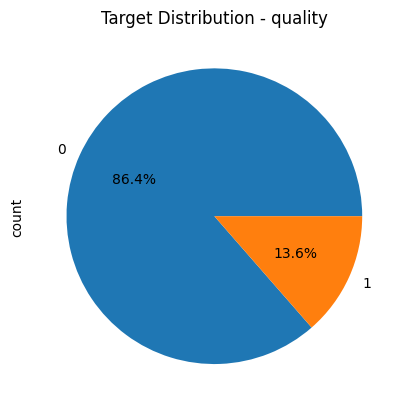

In [9]:
dataset.quality.value_counts().plot.pie(autopct="%1.1f%%")
dataset.quality.value_counts()
plt.title("Target Distribution - quality")
# unbalanced data. need to use under/over sampling.
# does tell us good wine is hard to get

In [10]:
feature_cols = dataset.drop(columns="quality").columns

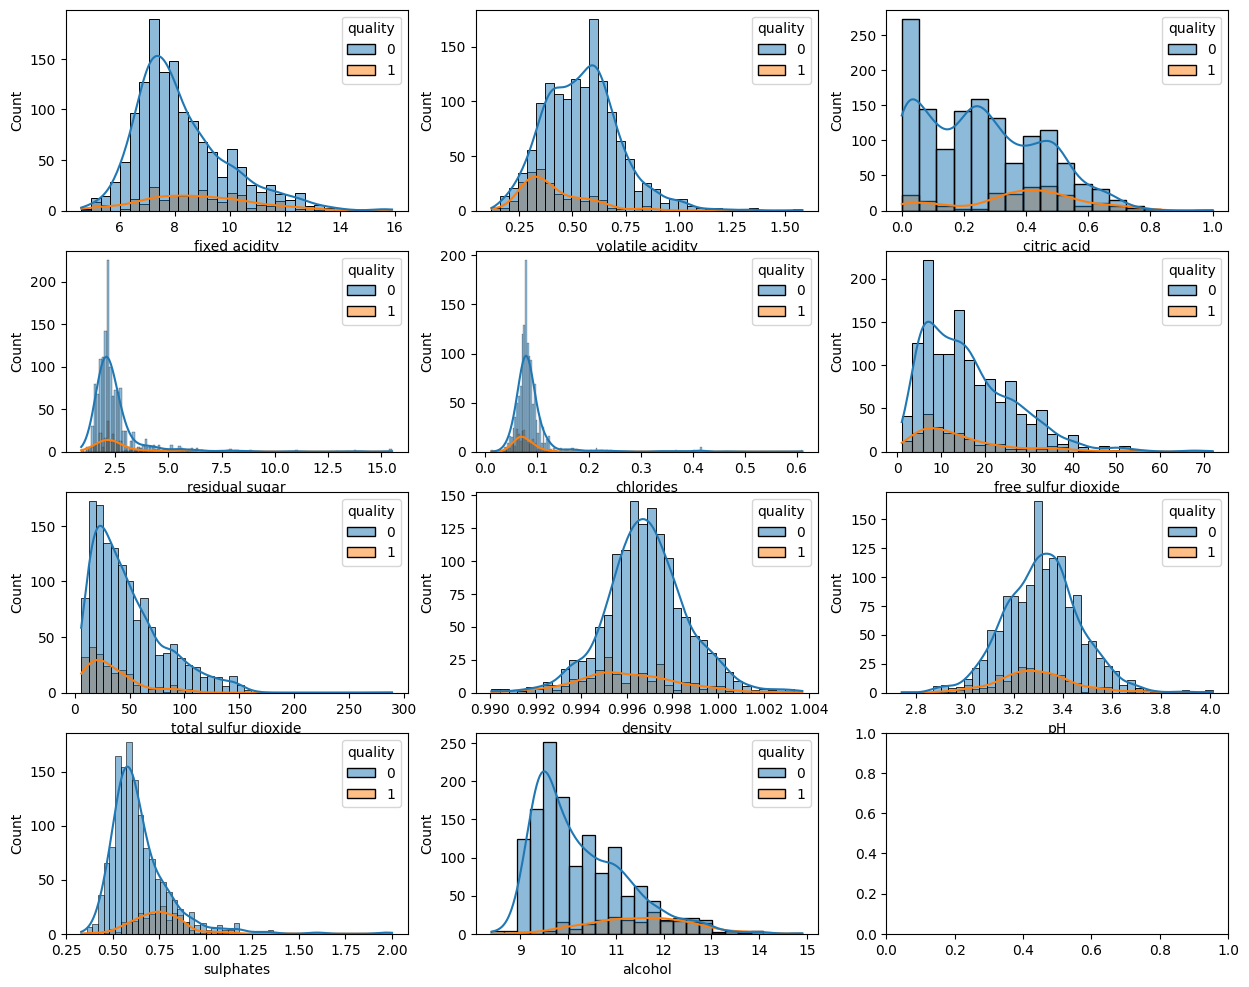

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
for col, ax in zip(feature_cols, axes.flatten()):
    sns.histplot(data=dataset, x=col, hue="quality", kde=True, ax=ax)

- wines with lower `volatile acidity` tend to have good quality.
- higher `alcohol` content is better desired.
- `free sulfur dioxide` and `total sulfur dioxide` are similar features.
- dropping columns `pH` and `residual sugar` as they are minimally correlated.


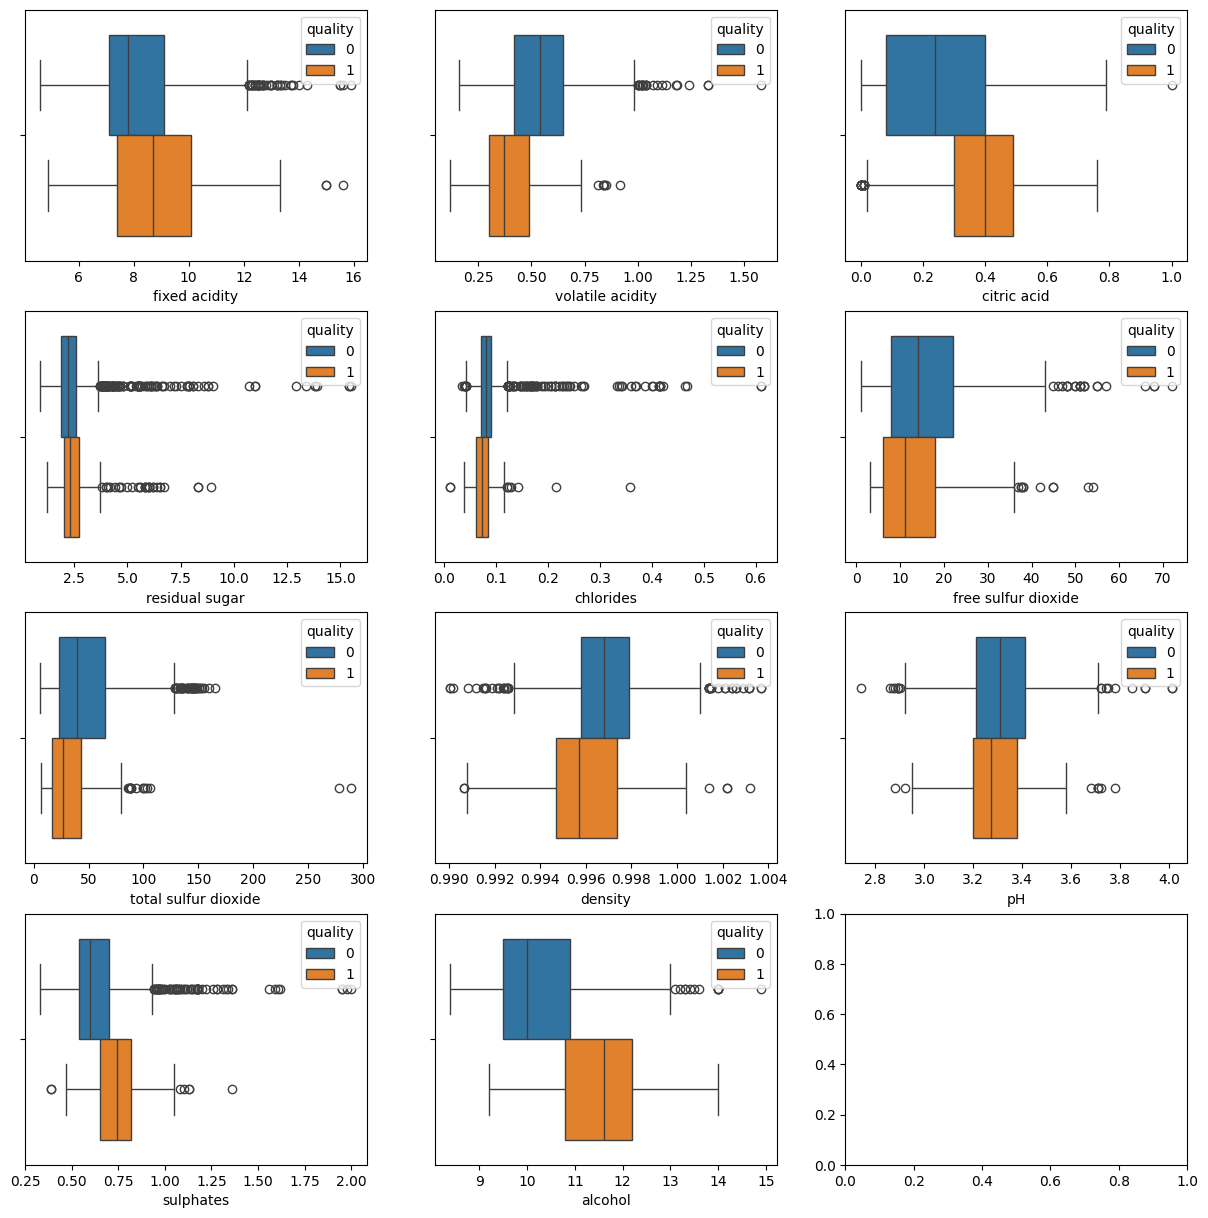

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
for col, ax in zip(feature_cols, axes.flatten()):
    sns.boxplot(data=dataset, x=col, hue="quality", ax=ax)
# presence of a lot of outliers. data is skewed heavily.

In [13]:
# combining columns "free sulfur dioxide" and "total sulfer dioxide" to create a new feature "sulfur dioxides"
dataset["sulpher dioxides"] = (
    dataset["free sulfur dioxide"] + dataset["total sulfur dioxide"]
)
dataset.drop(columns=["free sulfur dioxide", "total sulfur dioxide"], inplace=True)

<Axes: title={'center': 'Correlation'}>

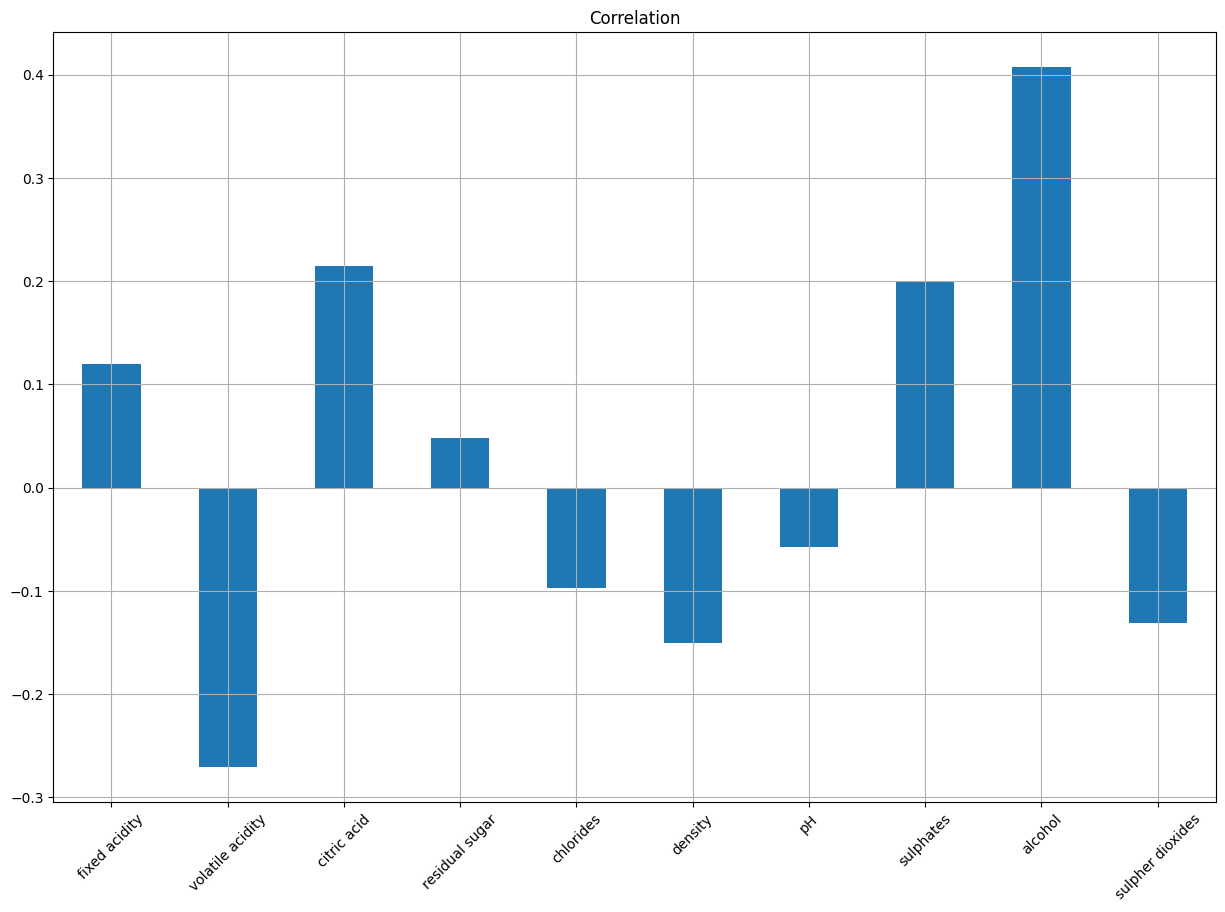

In [14]:
correlation_dataset = dataset.drop(columns="quality")
correlation_dataset.corrwith(dataset.quality).plot.bar(
    figsize=(15, 10), title="Correlation", rot=45, grid=True
)

<Axes: >

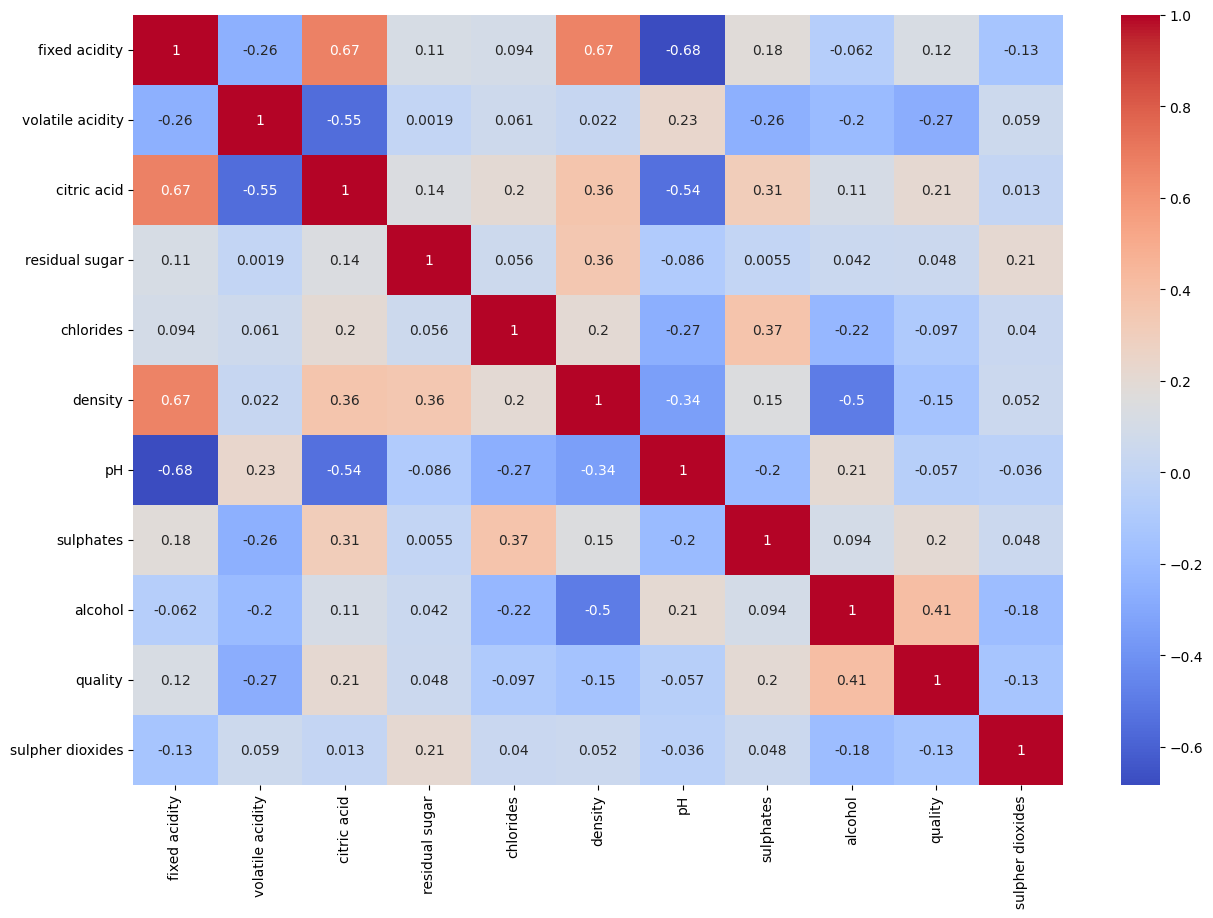

In [15]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)

In [16]:
# dropping "pH" and "residual sugar" columns as they don't affect the target very much.
dataset.drop(columns=["pH", "residual sugar"], inplace=True)

In [17]:
X = dataset.drop(columns="quality")  # features
y = dataset["quality"]  # target variable

In [18]:
# 20% test size
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
# scaling the features
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

## Building the models

1. Random Forest Classifier
2. Logistic Regression

In [20]:
# building the model
random_forest_classifier = RandomForestClassifier(
    n_estimators=100, random_state=42, criterion="entropy"
)
# fitting the data on to the model
random_forest_classifier.fit(X_train, y_train)

# making predictions from our model
y_preds = random_forest_classifier.predict(X_test)

random_forest_acc = accuracy_score(y_test, y_preds)

In [21]:
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

y_preds = logistic_regression_classifier.predict(X_test)
logistic_regression_acc = accuracy_score(y_test, y_preds)

## Visualising Results

[Text(0, 0, '0.853125'), Text(0, 0, '0.90625')]

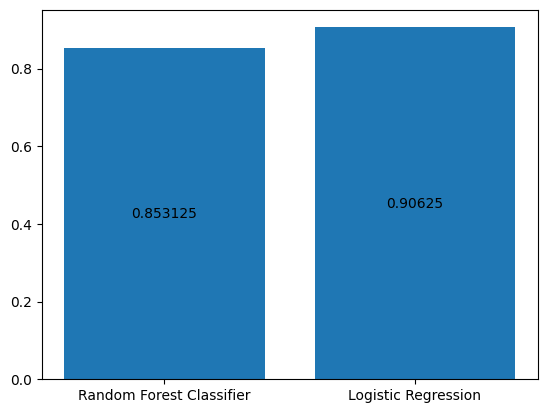

In [22]:
models = ["Random Forest Classifier", "Logistic Regression"]
figure = plt.bar(models, [logistic_regression_acc, random_forest_acc])
plt.bar_label(figure, label_type="center")